In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
from tqdm import tqdm

In [39]:
predictions=pd.read_csv('/content/predictions_gen_kps_with_trainer_predict_filtered.csv')
predictions['1'] = (predictions['1'] >=  0.5).astype(int)

In [40]:
predictions

,Unnamed: 0,arg_id,key_point_id,1
0,0,arg_0_0,kp_1_4,0
1,1,arg_0_0,kp_1_5,0
2,2,arg_0_0,kp_1_6,0
3,3,arg_0_0,kp_1_7,0
4,4,arg_0_0,kp_1_8,0
...,...,...,...,...
3531,3531,arg_2_209,kp_0_2,0
3532,3532,arg_2_209,kp_0_3,1
3533,3533,arg_2_209,kp_0_4,0
3534,3534,arg_2_209,kp_0_5,0


In [41]:
#preds=pd.read_csv('/content/final_preds_with_trainer_predict_filtered.csv')
#preds

In [42]:
df_kp = pd.read_csv('/content/generated_kps_filtered.csv')
df_kp['key_point_id'] = 'kp_0_0'
# Sort by 'topic' column to ensure rows are grouped by topic
df_kp = df_kp.sort_values('topic').reset_index(drop=True)

# Initialize variables
topic_to_id = {}      # Dictionary to map each topic to a unique numeric ID
keypoint_ids = []
keypoint_counter = 0   # Counter for keypoints within each topic
topic_id = 0           # Counter for unique topics

# Generate key_point_id for each row
for _, row in df_kp.iterrows():
    topic = row['topic']  # assuming 'topic' column exists

    # If topic is new, assign a new topic_id and reset keypoint counter
    if topic not in topic_to_id:
        topic_to_id[topic] = topic_id
        topic_id += 1
        keypoint_counter = 0  # Reset keypoint counter for new topic
    else:
        # Retrieve existing topic_id for the current topic
        topic_id_for_current_topic = topic_to_id[topic]

    # Create key_point_id and store it
    keypoint_id = f"kp_{topic_to_id[topic]}_{keypoint_counter}"
    keypoint_ids.append(keypoint_id)

    # Increment keypoint counter for the current topic
    keypoint_counter += 1

# Assign the generated key_point_ids to the new column
df_kp['key_point_id'] = keypoint_ids
df_arg = pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/Experiments_Meltemi/train_dev_test_dataset/arguments_human_translated_test.csv')

print(df_arg.shape,df_kp.shape)
df_kp.head()

def give_tuples(df_arguments,df_key_points):

  arguments = []
  key_points = []
  topics = []
  stance = []
  arg_ids =[]
  kp_ids = []

  for i,j,k,l in tqdm(zip(df_arguments['argument'],df_arguments['topic'],df_arguments['stance'],df_arguments['arg_id'])):
    df = df_key_points[(df_key_points['topic'] == j) & (df_key_points['stance'] == k)]
    #print()
    #print(j)
    #print(k)

    if(df.shape[0]>0):
      for o,p in zip(df['Meltemi_Instruct_16shot'],df['key_point_id']):
        arguments.append(i)
        key_points.append(o)
        topics.append(j)
        stance.append(k)
        arg_ids.append(l)
        kp_ids.append(p)



  return arguments,key_points,topics, stance,arg_ids,kp_ids

args,kps,topics,stance,arg_ids,kp_ids = give_tuples(df_arg,df_kp)
test_df = pd.DataFrame({'arg_id':arg_ids,'key_point_id':kp_ids,'argument':args, 'keypoint':kps, 'topic' : topics , 'stance': stance})

test_df.head()


(723, 4) (30, 7)


723it [00:01, 689.53it/s]


,arg_id,key_point_id,argument,keypoint,topic,stance
0,arg_0_0,kp_1_4,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Η φροντίδα των παιδιών είναι ευθύνη των γονέων,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
1,arg_0_0,kp_1_5,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Ο εμβολιασμός μπορεί να έχει απρόβλεπτες παρεν...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
2,arg_0_0,kp_1_6,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Η προσωπική αυτονομία είναι πιο σημαντική από ...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
3,arg_0_0,kp_1_7,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Η υποχρεωτικότητα των εμβολιασμών παραβιάζει τ...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
4,arg_0_0,kp_1_8,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Τα εμβόλια μπορεί να είναι επιβλαβή για τα παιδιά,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1


In [ ]:
test_df_selected = test_df[['argument','keypoint','topic','stance']]
preds_selected=predictions[['1']]
new_test= pd.concat([test_df_selected, preds_selected], axis=1)
new_test

#Display1: for each unique keypoint count the number of arguments that are labeled with '1'

 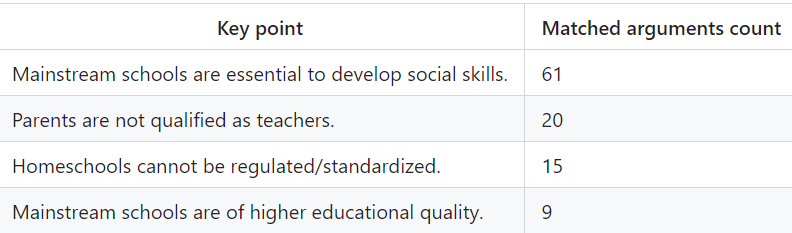

- Filter the original DataFrame to include only rows where binarized_score is 1.
- Group by the keypoint column and count the number of arguments for each unique keypoint.
- Create a new DataFrame with the keypoint and the corresponding count of matched arguments.

In [44]:
# Step 1: Filter the DataFrame to include only rows where 'binarized_score' is 1
filtered_df = new_test[new_test['1'] == 1]

# Step 2: Group by 'keypoint' and count the number of arguments
argument_counts = filtered_df.groupby(['keypoint', 'topic', 'stance'])['argument'].count().reset_index()
# Step 3: Rename the columns for clarity
argument_counts.rename(columns={'argument': 'matched_arguments_count'}, inplace=True)

argument_counts.sort_values(by=['topic', 'stance', 'matched_arguments_count'], ascending=[True, True, False], inplace=True)


In [45]:
argument_counts

,keypoint,topic,stance,matched_arguments_count
29,Το σύστημα υγείας των ΗΠΑ είναι πολύ ακριβό κα...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,21
13,Οι ΗΠΑ αντιμετωπίζουν σοβαρά κοινωνικά και οικ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,18
1,Διακρίσεις στην αγορά εργασίας,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,17
17,Οι Ηνωμένες Πολιτείες έχουν ένα ιστορικό φυλετ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,15
8,Η υγειονομική περίθαλψη και η εκπαίδευση είναι...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,12
3,Η εγκληματικότητα στις ΗΠΑ είναι ένα σημαντικό...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,9
28,Το Αμερικανικό Όνειρο,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,100
2,Η Αμερική είναι μια χώρα με πολλές ευκαιρίες γ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,80
18,Οι Ηνωμένες Πολιτείες προσφέρουν ευκαιρίες για...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,76
14,Οι ΗΠΑ είναι η καλύτερη χώρα για να ζει κανείς...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,61


#Display2: Display for each unique keypoint of a specific topic and stance its matching arguments

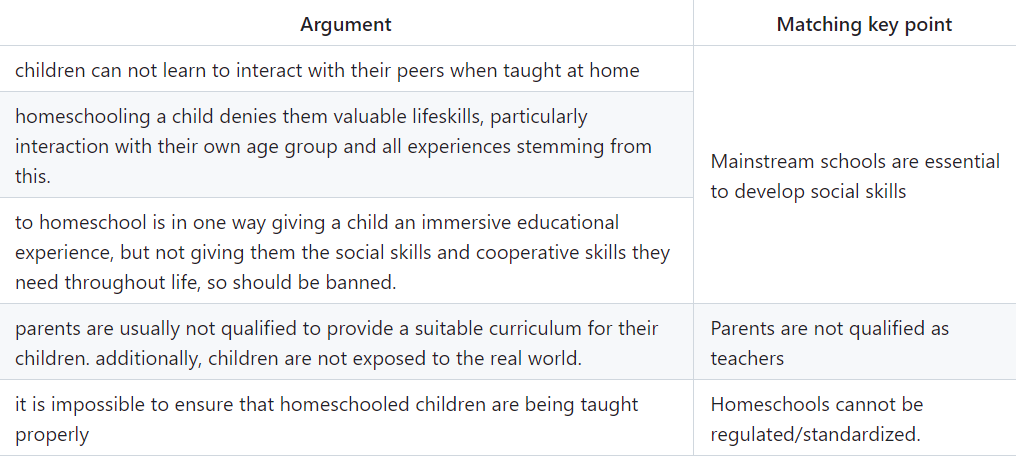

In [46]:
# Step 2: Sort the filtered DataFrame by 'topic', 'stance', 'keypoint'
sorted_df = filtered_df.sort_values(by=['topic', 'stance', 'keypoint'])

# Step 3: Select only the columns of interest
keypoint_df = sorted_df[['topic', 'stance', 'argument', 'keypoint']].rename(columns={'keypoint': 'matching_keypoint'})

In [47]:
keypoint_df

,topic,stance,argument,matching_keypoint
2285,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Φοβάμαι ότι υπάρχουν κάποιες ανησυχίες, λόγω τ...",Διακρίσεις στην αγορά εργασίας
2291,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Αν έχεις σκούρο δέρμα ή είσαι Λατίνος, οι ευκα...",Διακρίσεις στην αγορά εργασίας
2321,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Όχι, είναι μια χώρα με πολλούς περιορισμούς γι...",Διακρίσεις στην αγορά εργασίας
2339,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Όχι, είναι μια χώρα με πολλούς περιορισμούς γι...",Διακρίσεις στην αγορά εργασίας
2345,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Δεν είναι το καλύτερο μέρος για έγχρωμους ανθρ...,Διακρίσεις στην αγορά εργασίας
...,...,...,...,...
2258,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,"το κράτος πρέπει να εφαρμόσει μέτρα, για να με...",Τα μέσα κοινωνικής δικτύωσης θα πρέπει να ρυθμ...
2262,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,"θα πρέπει να ρυθμίσουν τα κοινωνικά δίκτυα , γ...",Τα μέσα κοινωνικής δικτύωσης θα πρέπει να ρυθμ...
2266,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,"ναι, γιατί γίνονται πολλά εγκλήματα και βιαιοπ...",Τα μέσα κοινωνικής δικτύωσης θα πρέπει να ρυθμ...
2270,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,"ναι, για να ελέγχονται οι τόσες πολλές ψευδείς...",Τα μέσα κοινωνικής δικτύωσης θα πρέπει να ρυθμ...


In [48]:
# Concatenate all arguments for each (topic, stance, matching_keypoint) combination
concatenated_df = (
    keypoint_df.groupby(['topic', 'stance', 'matching_keypoint'])['argument']
    .apply(lambda x: ' | '.join(x))
    .reset_index()
)

# Rename the 'argument' column to indicate it contains concatenated arguments
concatenated_df = concatenated_df.rename(columns={'argument': 'concatenated_arguments'})

concatenated_df


,topic,stance,matching_keypoint,concatenated_arguments
0,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Διακρίσεις στην αγορά εργασίας,"Φοβάμαι ότι υπάρχουν κάποιες ανησυχίες, λόγω τ..."
1,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Η εγκληματικότητα στις ΗΠΑ είναι ένα σημαντικό...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
2,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Η υγειονομική περίθαλψη και η εκπαίδευση είναι...,"Είναι πολύ δύσκολο να ζει κανείς στις ΗΠΑ, διό..."
3,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι ΗΠΑ αντιμετωπίζουν σοβαρά κοινωνικά και οικ...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
4,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες έχουν ένα ιστορικό φυλετ...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
5,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Το σύστημα υγείας των ΗΠΑ είναι πολύ ακριβό κα...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
6,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Η Αμερική είναι μια χώρα με πολλές ευκαιρίες γ...,Η Αμερική είναι μια χώρα με πολλές ευκαιρίες γ...
7,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι ΗΠΑ είναι η καλύτερη χώρα για να ζει κανείς...,"Εκτός από την ποικιλομορφία των ανθρώπων, οι Η..."
8,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι ΗΠΑ είναι μια ποικιλόμορφη χώρα,"Εκτός από την ποικιλομορφία των ανθρώπων, οι Η..."
9,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι ΗΠΑ ως παγκόσμια δύναμη ενθαρρύνουν τη μετα...,Είναι τέλεια. Η ζωή στον Ηνωμένες Πολιτείες απ...


#Compare to the reference labelled keypoints of the test set

In [49]:
refs=pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/Experiments_Meltemi/train_dev_test_dataset/final_data/test_human_gr.csv')
refsp

,Unnamed: 0,arg_id,key_point_id,label,arg,key_point,topic,stance
0,0,arg_0_0,kp_0_0,0,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,"Οι παιδικοί εμβολιασμοί ρουτίνας, και κυρίως ο...",Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
1,1,arg_0_0,kp_0_1,0,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Ο υποχρεωτικός εμβολιασμός έρχεται σε αντίθεση...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
2,2,arg_0_0,kp_0_2,0,Οι εμβολιασμοί ρουτίνας δεν είναι απαραίτητοι ...,Οι γονείς και όχι η πολιτεία είναι αυτοί που θ...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
3,3,arg_0_1,kp_0_3,0,Οι παιδικοί εμβολιασμοί ρουτίνας δεν θα πρέπει...,Οι παιδικοί εμβολιασμοί ρουτίνας δεν είναι απα...,Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
4,4,arg_0_1,kp_0_0,1,Οι παιδικοί εμβολιασμοί ρουτίνας δεν θα πρέπει...,"Οι παιδικοί εμβολιασμοί ρουτίνας, και κυρίως ο...",Οι παιδικοί εμβολιασμοί ρουτίνας θα πρέπει να ...,-1
...,...,...,...,...,...,...,...,...
3421,3421,arg_2_209,kp_2_9,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν υπέροχο περιβάλλον...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3422,3422,arg_2_209,kp_2_13,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν σπουδαίο λαό/πολιτ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3423,3423,arg_2_209,kp_2_10,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες είναι μια ισχυρή χώρα,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3424,3424,arg_2_209,kp_2_11,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν ισχυρή οικονομία/υ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1


In [50]:
# Step 1: Filter the DataFrame to include only rows where 'binarized_score' is 1
filtered_refs = refs[refs['label'] == 1]

# Step 2: Group by 'keypoint' and count the number of arguments
argument_counts_refs = filtered_refs.groupby(['key_point', 'topic', 'stance'])['arg'].count().reset_index()
# Step 3: Rename the columns for clarity
argument_counts_refs.rename(columns={'arg': 'matched_arguments_count'}, inplace=True)

argument_counts_refs.sort_values(by=['topic', 'stance', 'matched_arguments_count'], ascending=[True, True, False], inplace=True)


In [51]:
argument_counts_refs

,key_point,topic,stance,matched_arguments_count
31,Στις Ηνωμένες Πολιτείες υπάρχει ξενοφοβία και ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,17
12,Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,11
29,Στις Ηνωμένες Πολιτείες δεν υπάρχει ασφάλεια,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,11
14,Οι Ηνωμένες Πολιτείες έχουν ανισότητες και φτώ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,8
19,Οι Ηνωμένες Πολιτείες έχουν υψηλή φορολογία κα...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,8
13,Οι Ηνωμένες Πολιτείες έχουν ένα προβληματικό/δ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,7
30,Στις Ηνωμένες Πολιτείες υπάρχει η κουλτούρα τη...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,3
21,Οι Ηνωμένες Πολιτείες προσφέρουν μεγάλες ευκαι...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,45
15,Οι Ηνωμένες Πολιτείες έχουν ισχυρή οικονομία/υ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,35
22,Οι άνθρωποι στις Ηνωμένες Πολιτείες έχουν ελευ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,20


In [52]:
# Step 2: Sort the filtered DataFrame by 'topic', 'stance', 'keypoint'
sorted_refs = filtered_refs.sort_values(by=['topic', 'stance', 'key_point'])

# Step 3: Select only the columns of interest
keypoint_refs = sorted_refs[['topic', 'stance', 'arg', 'key_point']].rename(columns={'key_point': 'matching_keypoint'})
keypoint_refs

,topic,stance,arg,matching_keypoint
2169,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Οι ΗΠΑ είναι μια πολύ καπιταλιστική χώρα, δεν ...",Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...
2222,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι ΗΠΑ δεν είναι ένα καλό μέρος για να ζει καν...,Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...
2279,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες κατατάσσονται πλέον μετα...,Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...
2305,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Υπάρχει μεγάλη φτώχεια στις ΗΠΑ και δεν έχουν ...,Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...
2339,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,"Οι ΗΠΑ δεν είναι μια καλή χώρα να ζει κανείς, ...",Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...
...,...,...,...,...
1878,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,Η πλατφόρμα κοινωνικής δικτύωσης πρέπει να ρυθ...,Η ρύθμιση των μέσων κοινωνικής δικτύωσης μπορε...
1895,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,Υπήρξαν τόσα πολλά κακά πράγματα που διευθετήθ...,Η ρύθμιση των μέσων κοινωνικής δικτύωσης μπορε...
1900,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,Θα μπορούσαν να ελέγχουν και να κάνουν καλή δο...,Η ρύθμιση των μέσων κοινωνικής δικτύωσης μπορε...
1923,Οι πλατφόρμες κοινωνικής δικτύωσης θα πρέπει ν...,1,"Ναι, είναι απαραίτητο να αποφεύγεται το τόσο π...",Η ρύθμιση των μέσων κοινωνικής δικτύωσης μπορε...


In [53]:
# Concatenate all arguments for each (topic, stance, matching_keypoint) combination
concatenated_refs = (
    keypoint_refs.groupby(['topic', 'stance', 'matching_keypoint'])['arg']
    .apply(lambda x: ' | '.join(x))
    .reset_index()
)

# Rename the 'argument' column to indicate it contains concatenated arguments
concatenated_refs = concatenated_refs.rename(columns={'arg': 'concatenated_arguments'})

concatenated_refs

,topic,stance,matching_keypoint,concatenated_arguments
0,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες έχουν άδικες πολιτικές σ...,"Οι ΗΠΑ είναι μια πολύ καπιταλιστική χώρα, δεν ..."
1,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες έχουν ένα προβληματικό/δ...,"Όχι, είναι μια πολύ αυστηρή χώρα με ασταμάτητο..."
2,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες έχουν ανισότητες και φτώ...,Οι ΗΠΑ δεν είναι ένα καλό μέρος για να ζει καν...
3,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Οι Ηνωμένες Πολιτείες έχουν υψηλή φορολογία κα...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
4,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Στις Ηνωμένες Πολιτείες δεν υπάρχει ασφάλεια,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
5,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Στις Ηνωμένες Πολιτείες υπάρχει η κουλτούρα τη...,"Όχι, αφού πρόκειται για μια κουλτούρα που εξωθ..."
6,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,-1,Στις Ηνωμένες Πολιτείες υπάρχει ξενοφοβία και ...,"Υψηλά ποσοστά εγκληματικότητας, ρατσισμός, ξεν..."
7,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι Ηνωμένες Πολιτείες έχουν ισχυρή οικονομία/υ...,"Κάντε το αμερικανικό όνειρο για ισότητα, ελευθ..."
8,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι Ηνωμένες Πολιτείες έχουν καλό υγειονομικό κ...,Οι ΗΠΑ δίνουν στους ανθρώπους ευκαιρίες. Υπάρχ...
9,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1,Οι Ηνωμένες Πολιτείες έχουν σπουδαίο λαό/πολιτ...,"Τέλεια χώρα, τέλειοι άνθρωποι. Δεν θα την άλλα..."
